<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Oscar Flores y Andres Hernandez

**Fecha:** 2 de marzo de 2021

**Expediente** : 715029 y 
**Profesor:** Oscar David Jaramillo Zuluaga.

**Link Github:** https://github.com/OscarFlores-IFi/SPF-2021-Tareas

# Tarea 5: Clase 9

   
> Para las siguiente dos funciones, genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 1000 muestras generadas con el método de la transformada inversa y compárela con el función $f(x)$ **(recuerde que $f(x)$ es la distribución de probabilidad y $F(x)$ es la distribución de probabilidad acumulada)** [ver este enlace para más información](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n). Este procedimiento se realiza con el fín de validar que el procedimiento y los resultados son correctos.
    
> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

> **Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).


# Ejercicio 1

#### Solucion Oscar 

> Igualamos F a U

$u=\frac{2}{\pi}\sin^{-1}(\sqrt{x})$

> Despejamos x

$x=\sin^2(\frac{\pi u}{2})$

> Derivamos F para encontrar f

$f(x)=\frac{0.31831}{\sqrt{1-x} \sqrt{x}} $

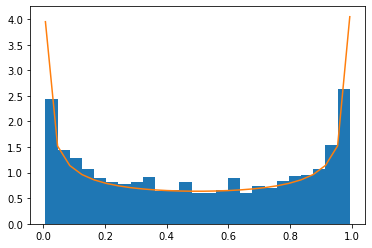

In [58]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

def F(n):
    u = np.random.uniform(0.05,0.95,size = n)
    y= np.sin(np.pi * u / 2) ** 2
    return y

N=1000

r1 = F(N)
y,x,_ = plt.hist(r1, bins=25, density=True)
y2 = (0.31831/(np.sqrt(1-x)*np.sqrt(x)))
plt.plot(x,y2);

#### Solucion Andrés

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

Para resolver este ejercicio mediante el metodo de la transformada inversa se toman unos pasos con anterioridad

>Nuestra función F(x) se iguala a U

$u=\frac{2}{\pi}\sin^{-1}(\sqrt{x})$

>Se despeja con respecto de x

$x=\sin^2(\frac{\pi u}{2})$

> Se deriva **F(x)** para poder evaluar los puntos en la función

$f(x)=\frac{1}{\pi \sqrt{{-x}{(x-1)}}}$

> Lo cual es igual a:

$f(x)=\frac{0.31831}{\sqrt{1-x} \sqrt{x}} $

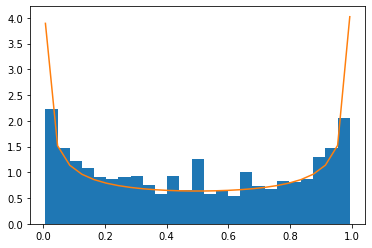

In [2]:
#Respuesta Andrés
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
N=1000
U=np.random.uniform(0.05,0.95, size=N)
y= lambda u: np.sin(np.pi*u/2)**2
H_inv_u=list(map(lambda u: y(u),U))

y,x,_=plt.hist(H_inv_u, bins=25, density=True);
f_x=(0.31831/(np.sqrt(1-x)*np.sqrt(x)))
plt.plot(x,f_x)

# Ejercicio 2

#### Solucion Oscar 

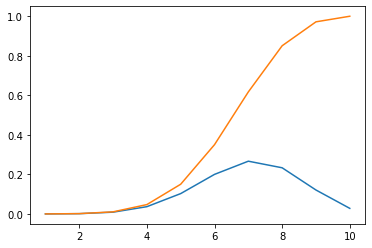

In [94]:
def binomial(n:int = 10, p:float = 0.5):
    idx = np.zeros(n)
    for i in range(n):
        idx[i] = np.math.factorial(n)/(np.math.factorial(i+1) * np.math.factorial(n - i - 1)) * p ** (i+1) * (1-p)**(n-i-1)
    return idx, idx.cumsum()


n = 10
p = 0.7
val = np.arange(1, n+1)

pdf,cdf = binomial(n,p)
plt.plot(val,pdf)
plt.plot(val,cdf);

In [95]:
def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U =np.random.rand(N)
    rand2reales = {i: idx for i, idx in enumerate(indices)}     # Diccionario de valores aleatorios
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)    # Series de los valores aletorios
    return y

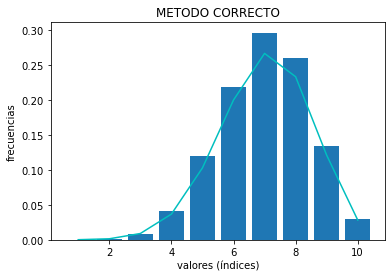

In [96]:
N = 10000
v = Gen_distr_discreta(cdf,val , N)

# Método 1 (Correcto)
y, x = np.histogram(v,bins=len(set(val)), density=True)
plt.bar(val, y)
plt.title('METODO CORRECTO')
plt.xlabel('valores (índices)')
plt.ylabel('frecuencias')
plt.plot(val,pdf, c = 'c')
plt.show()

#### Solucion Andrés

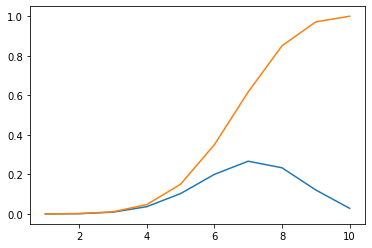

In [3]:
#Respuesta Andrés
def binom(n,p):
    P = np.zeros(n)
    for i in range (n):
        P[i] = (np.math.factorial(n)/(np.math.factorial(i+1)*np.math.factorial(n-i-1)))*p**(i+1)*((1-p)**(n-i-1))
    return P,P.cumsum() 
n = 10
p = 0.7
val=np.arange(1,n+1)
df,cf =binom(n,p)
plt.plot(val,df);
plt.plot(val,cf);

In [4]:
def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U =np.random.rand(N)
    # Diccionario de valores aleatorios
    rand2reales = {i: P for i, P in enumerate(indices)}
    # Series de los valores aletorios
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)

    return y

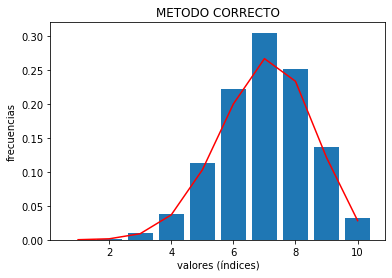

In [5]:
N = 10000
d_binomial = Gen_distr_discreta(cf, val, N)
y, x= np.histogram(d_binomial,bins=len(set(val)),density=True)
plt.bar(val,y)
plt.plot(val,df,c='r')
plt.title('METODO CORRECTO')
plt.xlabel('valores (índices)')
plt.ylabel('frecuencias')
plt.show()

Este ejercicio me trajo bastantes complicaciones, principalmente un error en el que parte de mis valores eran NaN y no me permitía hacer el histograma, sin embargo el ajustar la ecuación original arregló el error.